In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
import math 
import os 

from scipy.stats import chi2
from scipy.stats import multivariate_normal
from scipy.stats import norm

### 1.1 Gaussian Random Vectors


<strong> Definition 1</strong>:<em> Random vector x ∈ R n is Gaussian if it has density </em>

\begin{equation} \tag{1}
p_{x}(v) = \frac{1}{\sqrt{(2\pi)^{n}det(\Sigma)}} e^{\left(-\frac{1}{2}(v-\mu)^{T}\Sigma^{-1}(v-\mu)\right)}
\end{equation}

Where $\Sigma $ is semidefinite positive square matrix and thus have the following characteristics:
<ui>
    <li> The matrix is congruent with a diagonal matrix with positive real entries.</li> 
    <li> The matrix is symmetric or Hermitian, and all its eigenvalues are real and positive.</li>
    <li> There exists an invertible matrix </li>
</ui>

We will write a Gaussian random vector as:
\begin{equation} \tag{2}
    x ∼ N (\mu, \Sigma).
\end{equation}

Vector $µ ∈ R$ is the mean or expected value of x and is defined as:
\begin{equation} \tag{3}
    \mu = \mathbb{E}(x) = \int vp_{x}(v) dv
\end{equation}

and the matrix $\Sigma$ is the covariance matrix of x, given by:

\begin{equation}
    \begin{aligned} \tag{4}
        \Sigma = \mathbb{E}(\left (x-\mu)^{T}(x-\mu) \right)  \\
        \quad = \mathbb{E}( x^{T}x - x^{T}\mu -\mu^{T}x + \mu^{T}\mu) \\
        \quad = \mathbb{E}(x^{T}x) - \mathbb{E}(x^{T})\mu -\mu^{T}\mathbb{E}(x) -\mu^{T}\mu\mathbb{E}(1) \\
        \quad = \mathbb{E}(x^{T}x) - \mu^{T}\mu = cov(x,x)\\
    \end{aligned}
\end{equation}


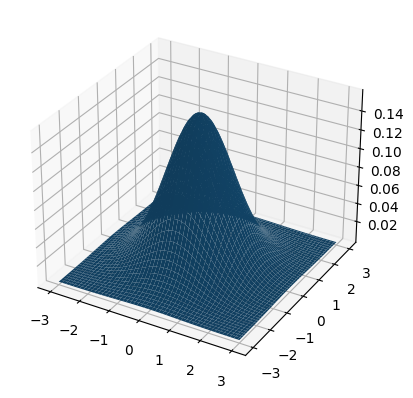

In [3]:
# Parameters 
dim = 2
mu = np.zeros(dim)
sigma = np.ones(dim)
covariance = np.diag(sigma**2)

# Calculations 
x, y = np.mgrid[-3.0:3.0:100j, -3.0:3.0:100j]
xy = np.column_stack([x.flat, y.flat])
z = (1 / np.sqrt( (2 * np.pi) ** (dim) * np.linalg.det(covariance))) * \
    np.exp( (-1/2) * np.sum((xy - mu) @ np.linalg.inv(covariance) * (xy - mu), axis=1))

# Plot figure
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');
ax.plot_surface(x,y,z.reshape(x.shape));


### 1.2 Confidence Ellipsoids

Using Equation (1) it is easy to show that $p_{x}(v)$ is constant for $(v − \mu)^T\Sigma^{-1}(v-mu) = \alpha$ i.e., on the surface of the elipsoid: 

\begin{equation}\tag{5}
    \epsilon_{\alpha} =\{v | (v-\mu)^T \Sigma^{-1} (v-\mu)\}
\end{equation}

<strong> Definition 2.</strong><em> η-confidence set for random variable z is the smallest volume set S such that:</em>

\begin{equation}\tag{6}
    \mathbb{P}[z \in S] \geq η
\end{equation}


<strong> Definition 3.</strong>(Confidence Ellipsoids)<em> For Gaussian random variables, the Eα are the η-confidence sets
(using Equation (5)), and are called confidence ellipsoids, where α determines confidence level η.</em>

Mean µ gives the center of the ellipsoid $\epsilon$, and semiaxes are defined as $\sqrt{\alpha \lambda_{i}\mu_{i}}$, where $\mu_{i}$ are orthonormal eigenvectors of $\Sigma$ with eigenvalues $\lambda_{i}$

#### 1.2.1 Confidence levels 

Notice that since x is a Gaussian random variable and $\Sigma$ is a semi possitive symetric matrix, the non-negative random variable $(v − \mu)^T\Sigma^{-1}(v-mu)$ has a $\mathbb{X}^{2}$ with a $\mathbb{F}_{\mathbb{X}^{2}}(\alpha)$ CDF. Hence, using the above confidence ellipsoid’s definition $\mathbb{P}[x \in \epsilon_{\alpha}] = \mathbb{F}_{\mathbb{X}^{2}}(\alpha)$. Some good approximations are:
- $\epsilon_{n}$ gives about 50% of probability mass
- $\epsilon_{n+\frac{2}{\sqrt{n}}}$ gives about 90% of probability mass



__Example 2__ <br>
_Let $x ∼ N (µ, Σ)$ with $ \mu = [1,2]^{T}$ and $\Sigma = \bigl(\begin{smallmatrix}2 & 1\\ 1 & 1\end{smallmatrix}\bigr)$ then 90% condifence elliposid corresponds to $\alpha = 4.6$._


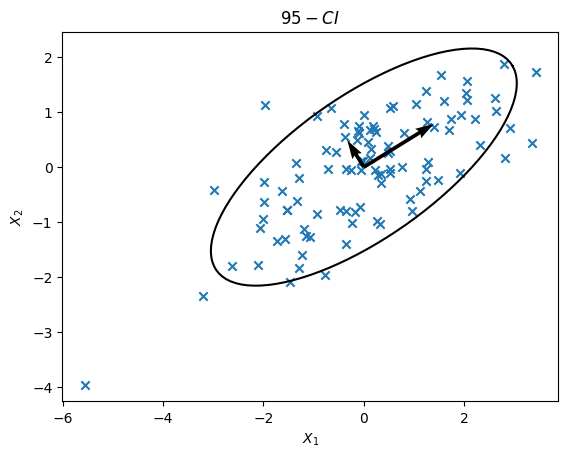

In [4]:
# Define distribution  
mu = np.array([0,0])
covariance = np.array([[2,1],[1,1]])

# Find alpha
x = np.linspace(0, 20, 100)
y = chi2.cdf(x, df=2)
alpha = next(x[idx] for idx, p in enumerate(y) if p > 0.90)

# Eigen-decomposition
eig_value, eig_vector = np.linalg.eig(covariance)


r = np.array([[np.cos(t), np.sin(t)] for t in np.linspace(0, 2*np.pi, 100)])
ax = np.sqrt(alpha * eig_value) * eig_vector
ci = mu +  r @ ax.T

# Sample 100 
sample = np.random.multivariate_normal(mu, covariance, 100)


fig, axis = plt.subplots()
axis.plot(ci[:,0], ci[:,1], color="black");
axis.scatter(sample[:,0], sample[:,1], marker="x");
axis.quiver(*mu, *ax[:,0], color=['black'], scale=21);
axis.quiver(*mu, *ax[:,1], color=['black'], scale=21);

axis.set_ylabel(r"$X_{2}$");
axis.set_xlabel(r"$X_{1}$");
axis.set_title(r"$95-CI$");

### 1.3 Affine Transformations

Suppose that $x \sim \mathbb{N} (\mu, \Sigma_{x}) $  Consider an affine transformation of $x: z = Ax + b$, where $A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^{m}$ Then z is Gaussian with mean: 

\begin{equation}\tag{7}
    \bar{z} = \mathbb{E}z = \mathbb{Ax+b} = A\mathbb{E}(x) + b\mathbb{E}(1)= A\mu
\end{equation}

and covariance 

\begin{equation}
    \begin{aligned} \tag{8}
        \Sigma_{z} = \mathbb{E} \left((z - \mathbb{E}(z))^{T} (z - \mathbb{E}(z)) \right) \\
        \quad = \mathbb{E} \left((z - \hat{z})^{T} (z - \hat{z}) \right) \\
        \quad = \mathbb{E} \left((Ax+b-A\mu-b)^{T} (Ax+b-A\mu-b) \right) \\
        \quad = \mathbb{E} \left((Ax-A\mu)^{T} (Ax-A\mu) \right) \\
        \quad = \mathbb{E} \left(A^{T}(x-\mu)^{T} (x-\mu)A \right) \\
        \quad = A^{T}\mathbb{E} \left((x-\mu)^{T} (x-\mu)\right)A \\
        \quad = A^{T}\Sigma_{x}A \\
    \end{aligned}
\end{equation}

#### 1.3.1 Sampling form a multivariate normal
The previous formula helps us to sample from any multivariate Guassian. To do this sampling we can sample from the standard normal distribution $x ∼ N (0, I)$ where the mean is the vector $u = 0$ and the covariance is the identiy matrix. Sampling from this distribution is easier because each variable in $x$
is independent from all other variables, we can just sample each variable separately.

It is then possible to sample $y$ from $ N (\mu_{y}, \Sigma_{y})$ by sampling $x$ and applying the affine transform on the samples. This transform is: $y = Ax+\mu$ where we know from the previous section that the covariance of $y$ will be $\Sigma_{y} = A\Sigma_{x}A^{T}$. Since $\Sigma_{x} = I$ we can write that $\Sigma_{y} = AA^{T}$. A can now be found by a rechnique called the <a href=https://en.wikipedia.org/wiki/Cholesky_decomposition>Cholesky decomposition</a> which does exactly the decomposition we need. The vector u is then $\mu_y$ since $\mu_x=0$. Lets exemplify this by sample 50 sample from: 


\begin{equation}\notag
    Y \sim \mathbb{N} (\begin{bmatrix} 1 \\ 2 \end{bmatrix}, \begin{bmatrix} 1 & 0.8 \\ 0.8 & 1 \end{bmatrix})
\end{equation}


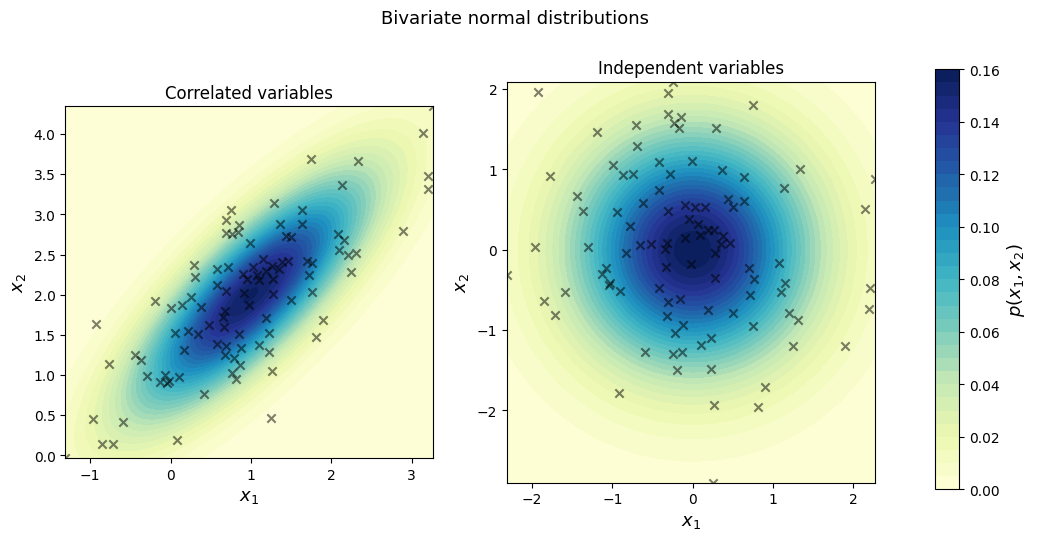

In [5]:
u = np.array([1, 2])
cov = np.array([
    [1, 0.8], 
    [0.8, 1]
])

samples = np.random.normal(size=(100, 2))
A = np.linalg.cholesky(cov)
y = samples @ A.T + u


fig, ax = plt.subplots(1,2,figsize=(12, 6))

X = np.linspace(np.min(y[:,0]), np.max(y[:,0]),100)
Y = np.linspace(np.min(y[:,1]), np.max(y[:,1]),100)
xx, yy = np.meshgrid(X,Y)
Z = multivariate_normal(u.flatten() ,cov).pdf(np.dstack((xx, yy)))
con = ax[0].contourf(X, Y, Z, 33, cmap=cm.YlGnBu)
ax[0].scatter(y[:,0], y[:,1], alpha=0.5, marker="x", color="black")
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$', fontsize=13)
ax[0].set_ylabel('$x_2$', fontsize=13)
ax[0].set_title('Correlated variables', fontsize=12)

X = np.linspace(np.min(samples[:,0]), np.max(samples[:,0]),100)
Y = np.linspace(np.min(samples[:,1]), np.max(samples[:,1]),100)
xx, yy = np.meshgrid(X,Y)
Z = multivariate_normal(np.zeros(2) ,np.identity(2)).pdf(np.dstack((xx, yy)))
con = ax[1].contourf(X, Y, Z, 33, cmap=cm.YlGnBu)
ax[1].scatter(samples[:,0], samples[:,1], alpha=0.5, marker="x", color="black")
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$', fontsize=13)
ax[1].set_ylabel('$x_2$', fontsize=13)
ax[1].set_title('Independent variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()

#### 1.3.2 Normalizing

__Example 4__ <br>
Conversely given $x \sim \mathbb{N}(\mu, \Sigma)$ we can define a new random variable $z=Ax+b$ where $z \sim \mathbb{N}(0, I)$. To find the transformation we need find the matrix A so that: $A^{T}\Sigma_{x}A = I$. To solve for A we can utelize the fact that $A^{T}\Sigma_{x}A$ is a <a url=https://en.wikipedia.org/wiki/Definite_matrix> semidefinite positive matrix </a>. Consequently, we can decompose $\Sigma_x = PDP^{-1}$ and because $\Sigma_x$ is semidefinite and possitive all of its eigenvalues are non-negative. Therefore we can derive the following: 

\begin{equation}
    \begin{aligned} \notag
        \Sigma_x = PDP^{-1} \\
        \quad = (D^{-\frac{1}{2}}P^{-1}) \Sigma_x (PD^{-\frac{1}{2}}) =(D^{-\frac{1}{2}}P^{-1}) PDP^{-1} (PD^{-\frac{1}{2}}) \\
        \quad = (D^{-\frac{1}{2}}P^{-1}) \Sigma_x (PD^{-\frac{1}{2}}) = I \\
        \quad = (D^{-\frac{1}{2}}P^{-1}) \Sigma_x (D^{-\frac{1}{2}}P^{-1})^{T} = I \\
    \end{aligned}
\end{equation}

Thus we can define $A = D^{-\frac{1}{2}}P^{-1} = D^{-\frac{1}{2}}P^{T}$ and $b= -A\mu_{x}$

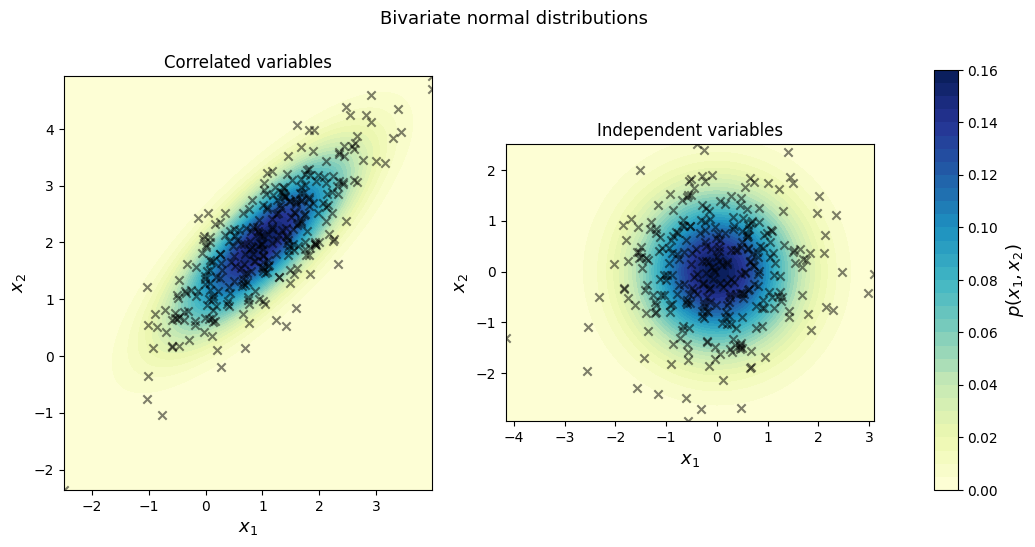

In [6]:
u = np.array([1, 2])
cov = np.array([
    [1, 0.8], 
    [0.8, 1]
])

samples = np.random.multivariate_normal(u,cov, 300)
D, P = np.linalg.eig(cov)
A = np.diag(1 / np.sqrt(D)) @ P.T
z = samples @ A.T - np.mean(samples, axis=0) @ A.T


fig, ax = plt.subplots(1,2,figsize=(12, 6))

X = np.linspace(np.min(samples[:,0]), np.max(samples[:,0]),100)
Y = np.linspace(np.min(samples[:,1]), np.max(samples[:,1]),100)
xx, yy = np.meshgrid(X,Y)
Z = multivariate_normal(u ,cov).pdf(np.dstack((xx, yy)))
con = ax[0].contourf(X, Y, Z, 33, cmap=cm.YlGnBu)
ax[0].scatter(samples[:,0], samples[:,1], alpha=0.5, marker="x", color="black")
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$', fontsize=13)
ax[0].set_ylabel('$x_2$', fontsize=13)
ax[0].set_title('Correlated variables', fontsize=12)

X = np.linspace(np.min(z[:,0]), np.max(z[:,0]),100)
Y = np.linspace(np.min(z[:,1]), np.max(z[:,1]),100)
xx, yy = np.meshgrid(X,Y)
Z = multivariate_normal(np.zeros(2) ,np.identity(2)).pdf(np.dstack((xx, yy)))
con = ax[1].contourf(X, Y, Z, 33, cmap=cm.YlGnBu)
ax[1].scatter(z[:,0], z[:,1], alpha=0.5, marker="x", color="black")
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$', fontsize=13)
ax[1].set_ylabel('$x_2$', fontsize=13)
ax[1].set_title('Independent variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()

#### 1.4 Linear Measurements

Suppose that we obtain linear measurements with noise $y=Ax+v$ where $x \in \mathbb{R}^{n}$ is what we want to estimate, $y \in \mathbb{R}^{m}$ is a measurement, $A \in \mathbb{R}^{m \times n}$ characterizes sensors or measurements and v is a senso noise. We also assume that $x \sim \mathbb{N}(\bar{x}, \Sigma_{x})$ so the _prior distribution_ of x describes initial uncertanty about $x$ is given. Another assumption is $v \sim \mathbb{N}(\bar{v}, \Sigma_{v})$, where $\bar{v}$ is the noise bias or offset and $\Sigma_x$ is the noise covariance. x and v are assumed to be independent. Then we have:  

\begin{equation} \tag{9}
    \begin{bmatrix} 
        \bar{x} \\ 
        \bar{v}   
    \end{bmatrix} \sim \mathbb{N} \left( 
    \begin{bmatrix} 
        \bar{x} \\ 
        \bar{v} 
    \end{bmatrix}, 
    \begin{bmatrix} 
        \Sigma_{x} & . \\ 
        . & \Sigma_{v} 
    \end{bmatrix} \right)
\end{equation}

We can write

\begin{equation} \tag{10}
    \mathbb{E}     
    \begin{bmatrix} 
        \bar{x} \\ 
        \bar{v}   
    \end{bmatrix} =
    \begin{bmatrix} 
        \bar{x} \\ 
        A\bar{x} + v
    \end{bmatrix}
\end{equation}

Therefore 

\begin{equation} \tag{11}
    \mathbb{E} 
    \Biggr[
    \begin{bmatrix} 
        x - \bar{x} \\ 
        v - \bar{v}   
    \end{bmatrix} 
    \begin{bmatrix} 
        x - \bar{x} \\ 
        v - \bar{v}   
    \end{bmatrix} ^ {T}
    \Biggr] = 
    \begin{bmatrix} 
        I & 0 \\ 
        A & I 
    \end{bmatrix}
    \begin{bmatrix} 
        \Sigma_x & 0 \\ 
        0 & \Sigma_v 
    \end{bmatrix}
    \begin{bmatrix} 
        I & 0 \\ 
        A & I 
    \end{bmatrix} ^ {T}   
    =
    \begin{bmatrix} 
        \Sigma_x & \Sigma_x A^{T} \\ 
        A\Sigma_x & A \Sigma_x A^{T} + \Sigma_v
    \end{bmatrix}
\end{equation}


We showed that the covariance of measurement y is $A \Sigma_x A^{T} + \Sigma_v$, where first term $A \Sigma_x A^{T}$ is called the signal covariance and second term $\Sigma_v$, as mentioned before, noise covariance.



Example.

Let's assume that you are tasked to conduct a survey on the heights of a given poulation. It is reassonable to assume that the heights of a given population is normaly distributet, e.g. $h \sim \mathbb{N}(\bar{h}, \Sigma_{h})$. In order to meassure your population you decide to utelize a meassuring tape and eyeball the height. During your prestudy you identify the error that this type of meassurment technique could introduce. To counteract these errors, you create a simple test where you conclude that you on average meassure 5cm above the true height with a varaince of 2cm. These meassurement errors are assumed to be normally distributed $e \sim \mathbb{N}(\bar{e}, \Sigma_{e})$ and independent of the actuall height of an individual. 

Text(0.5, 1.0, 'Heights')

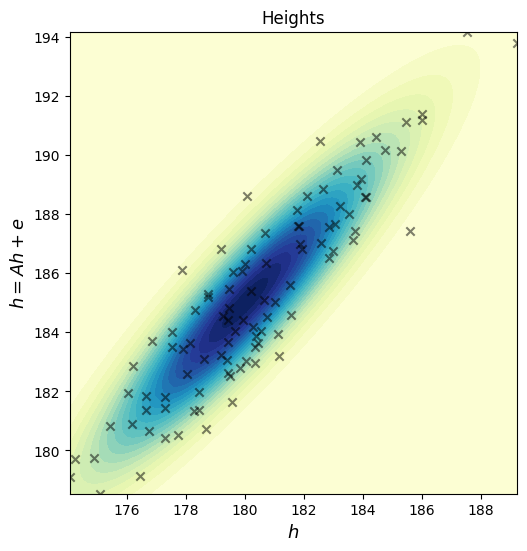

In [24]:
# Parameters for height
cov_h = 10 
mu_h = 180

# Parameters for errors
cov_e = 2 
mu_e = 5

# Population sampled from a normal distribution
x = np.random.normal(mu_h, cov_h, 100)

# Calculate the join distribution between height and meassurement errors 
A = 1
cov = np.array([[1, 0],[A, 1]]) @ np.array([[cov_h, 0],[0, cov_e]]) @ np.array([[1, 0],[A, 1]]).T
mu = np.array([[1, 0],[A, 1]]) @ np.array([[mu_h],[mu_e]]) 

# Sample from the jointly distribution
samples = np.random.multivariate_normal(mu.flatten(), cov, 100)


fig, ax = plt.subplots(1,figsize=(12, 6))
X = np.linspace(np.min(samples[:,0]), np.max(samples[:,0]),100)
Y = np.linspace(np.min(samples[:,1]), np.max(samples[:,1]),100)
xx, yy = np.meshgrid(X,Y)
Z = multivariate_normal(mu.flatten() ,cov).pdf(np.dstack((xx, yy)))
con = ax.contourf(X, Y, Z, 33, cmap=cm.YlGnBu)
ax.scatter(samples[:,0], samples[:,1], alpha=0.5, marker="x", color="black")
ax.set_aspect('equal')
ax.set_xlabel('$h$', fontsize=13)
ax.set_ylabel('$h=Ah+e$', fontsize=13)
ax.set_title('Heights', fontsize=12)



#### 1.4 Marginal distribution

A marginal distribution is the distribution of a subset of random variables from the original distribution. It represents the probabilities or densities of the variables in the subset without reference to the other values in the original distribution. In our case of the 2D multivariate normal the marginal distributions are the univariate distributions of each component and separately. These could be derived by utelizing the affine mapping shown previously. For example, let us derive the univariate distribution from the previous jontly distribution by choosing $A_{y} = \begin{bmatrix} 0 & 1 \end{bmatrix}$ and $A_{x} = \begin{bmatrix} 1 & 0 \end{bmatrix}$ Then it could be shown: 


\begin{equation} \tag{12}
    \Sigma_y = 
    \begin{bmatrix} 
        0 & 1 
    \end{bmatrix}
    \begin{bmatrix} 
        \Sigma_x & \Sigma_x A^{T} \\ 
        A\Sigma_x & A \Sigma_x A^{T} + \Sigma_v
    \end{bmatrix}
    \begin{bmatrix} 
        0 & 1 
    \end{bmatrix} ^ {T}  = A \Sigma_x A^{T} + \Sigma_v, 
    \quad
    \mu_y =     
    \begin{bmatrix} 
        0 & 1 
    \end{bmatrix}
    \begin{bmatrix} 
        \bar{x} \\ 
        A\bar{x} + v
    \end{bmatrix} = A\bar{x} + v
\end{equation}

and 

\begin{equation} \tag{13}
    \Sigma_e = 
    \begin{bmatrix} 
        1 & 0
    \end{bmatrix}
    \begin{bmatrix} 
        \Sigma_x & \Sigma_x A^{T} \\ 
        A\Sigma_x & A \Sigma_x A^{T} + \Sigma_v
    \end{bmatrix}
    \begin{bmatrix} 
        1 & 0
    \end{bmatrix} ^ {T}  = \Sigma_x
    \quad
    \mu_y =     
    \begin{bmatrix} 
        1 & 0 
    \end{bmatrix}
    \begin{bmatrix} 
        \bar{x} \\ 
        A\bar{x} + v
    \end{bmatrix} = \bar{x}
\end{equation}

(-3.0, 3.0)

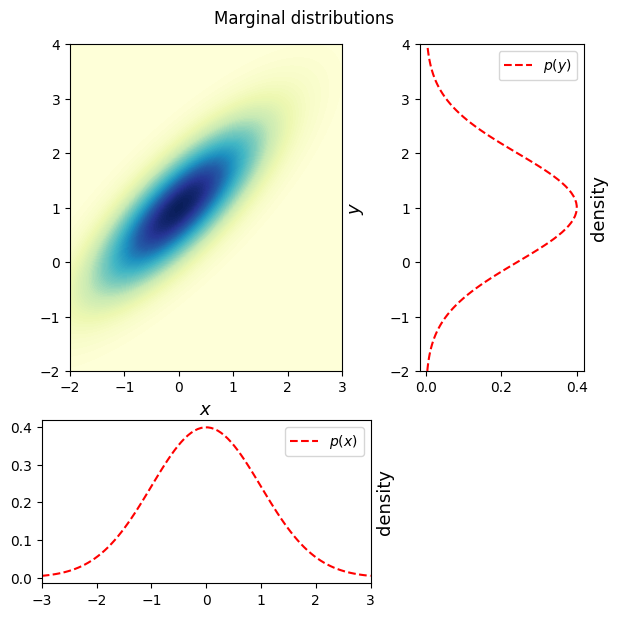

In [8]:
mu = np.array([[0.], [1.]])
cov = np.array([
    [1, 0.8], 
    [0.8, 1]
])

# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
plt.suptitle('Marginal distributions', y=0.93)

ax1 = plt.subplot(gs[0])
# Plot bivariate distribution
X = np.linspace(-2, 4,100)
Y = np.linspace(-2, 4,100)
xx, yy = np.meshgrid(X,Y)
Z = multivariate_normal(mu.flatten() ,cov).pdf(np.dstack((xx, yy)))
con = ax1.contourf(X, Y, Z, 100, cmap=cm.YlGnBu)
ax1.set_aspect('equal')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-2, 3, -2, 4])

# Plot x
ax2 = plt.subplot(gs[1])
x = np.linspace(-2, 4,100)
px = norm(mu[1], cov[1,1]).pdf(x)
# Plot univariate distribution
ax2.plot(px, x,'r--', label=f'$p(y)$')
ax2.legend(loc=0)
ax2.set_ylabel('density', fontsize=13)
ax2.yaxis.set_label_position('right')
ax2.set_ylim(-2, 4)


# Plot y
ax3 = plt.subplot(gs[2])
x = np.linspace(-3, 3,100)
px = norm(mu[0], cov[0,0]).pdf(x)
# Plot univariate distribution
ax3.plot(x, px, 'r--', label=f'$p(x)$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-3, 3)


#### 1.5 Conditional distribution

Given:

\begin{equation} \notag
    \mu =
    \begin{bmatrix} 
        \mu_a \\ 
        \mu_b
    \end{bmatrix},
    \quad
    \Sigma =
    \begin{bmatrix} 
        \Sigma_{aa} && \Sigma_{ab} \\ 
        \Sigma_{ab}^{T} && \Sigma_{bb}
    \end{bmatrix}
\end{equation}

Then the conditional density $p(x_{a}|x_{b})$ is given by:

\begin{equation} \notag
    p(x_{a}|x_{b}) \sim \mathbb{N}(\mu_{a|b}, \Sigma_{a|b})
\end{equation}

Where:
\begin{equation} \notag
    \begin{aligned} 
        \mu_{a|b} = \mu_{a} - \Sigma_{ab}\Sigma_{bb}^{-1}(x_{b} - \mu_{b}) \\
        \Sigma_{a|b} = \Sigma_{aa} - \Sigma_{ab}\Sigma_{bb}^{-1}\Sigma_{ab}^{T}
    \end{aligned} 
\end{equation}

With the Schur complement ($A - CB^{-1}C^{T} = \bar{A}^{-1}$) of $B$ in $\Sigma$ the conditional covariance matrix $\Sigma_{a|b}$ can be viewed as inverting the covariance matrix $\Sigma^{-1} = \Lambda$, dropping the rows and columns corresponding to the variables $b$ that are being conditioned upon, and inverting back to get the conditional covariance matrix $\Sigma_{a|b} = \bar{A}^{-1}$ 

The shift of the mean can be seen as getting the residual of the variable conditioned upon $(a-\mu_a)$, normalizing this with the $B$ of the variable conditioned upon, and transforming it to the space of $a$ by the covariances between $a$ and $b$ ($C$)



***

#### Proof:

We will make use of the fact that
\begin{equation} \tag{13}
    \begin{aligned} 
        p(x_{a}|x_{b}) = \frac{p(x_{a},x_{b})}{p(x_{b})}
    \end{aligned} 
\end{equation}

which is according to the definition of the normal distribution (see eq.(1)) is

\begin{equation} \tag{14}
    \begin{aligned} 
        p(x_{a}|x_{b}) = \frac{\sqrt{det(\Sigma_{bb})}}{(2\pi)^{n_{a}/2} \sqrt{det(\Sigma)}}\exp(E) \\
        E = -\frac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu)-\frac{1}{2}(x_b-\mu_b)^{T}\Sigma_{bb}^{-1}(x_b-\mu_b)
    \end{aligned} 
\end{equation}

Since


\begin{equation} \tag{15}
    det(\Sigma)  =
    \begin{bmatrix} 
        \Sigma_{aa} && \Sigma_{ab} \\ 
        \Sigma_{ab}^{T} && \Sigma_{bb}   
    \end{bmatrix} = det(\Sigma_{bb}) det(\Sigma_{aa}-\Sigma_{ab}\Sigma_{bb}^{-1}\Sigma_{ab}^{T})
\end{equation}

\begin{equation} \tag{16}
    \begin{aligned}
    \begin{bmatrix} 
        A && B \\ 
        C && D   
    \end{bmatrix} ^ {-1} = 
    \begin{bmatrix} 
        \Lambda_{aa} && \Lambda_{ab} \\ 
        \Lambda_{ba} && \Lambda_{bb}   
    \end{bmatrix} =
    \begin{bmatrix} 
        \mu && -\mu B D^{-1}\\ 
        D^{-1} C \mu && D^{-1} + D C^{-1} \mu B D^{-1}
    \end{bmatrix}, \quad
    \mu = (A - B D^{-1} C)^{-1}
    \end{aligned}
\end{equation}

the constant in front of the exponential in (14) results in the following expression

\begin{equation} \tag{17}
    \frac{\sqrt{det(\Sigma_{bb})}}{(2\pi)^{n_{a}/2} \sqrt{det(\Sigma)}} = \frac{\sqrt{det(\Sigma_{bb})}}{(2\pi)^{n_{a}/2} \sqrt{det(\Sigma_{bb})det(\Sigma_{aa} - \Sigma_{ab} \Sigma_{bb}^{-1} \Sigma_{ba})}} = \frac{1}{(2\pi)^{n_{a}/2} \sqrt{det(\Lambda_{aa}^{-1})}}
\end{equation}

The precision matrix E, eq. (14), is given by

\begin{equation} \tag{18}
    \begin{aligned}
    E = -\frac{1}{2}(x-\mu)^{T}\Lambda(x-\mu) -\frac{1}{2}(x_{b}-\mu_{b})^{T}\Sigma_{bb}^{-1}(x_{b}-\mu_{b}) \\
    = -\frac{1}{2}((x_{a}-\mu_{a})^{T}\Lambda_{aa}^{-1}(x_{a}-\mu_{a}) 
        +(x_{a}-\mu_{a})^{T}\Lambda_{ba}^{-1}(x_{b}-\mu_{b}) \\
        +(x_{b}-\mu_{b})^{T}\Lambda_{ab}^{-1}(x_{b}-\mu_{b}) 
        +(x_{b}-\mu_{b})^{T}(\Lambda_{bb}^{-1} + \Sigma_{bb}^{-1})(x_{b}-\mu_{b}))\\
    = -\frac{1}{2}(x_{a}^{T}\Lambda_{aa}^{-1}x_{a}
        +x_{a}^{T}(\Lambda_{aa} \mu_{a} + \Lambda_{ab}(x_{b} - \mu_{b})) 
        +\mu_{a}^{T}\Lambda_{aa}^{-1}\mu_{a} \\
        +\mu_{a}^{T}\Lambda_{ab}^{-1}(x_{b}-\mu_{b})
        +(x_{b}-\mu_{b})^{T}(\Lambda_{bb}^{-1} + \Sigma_{bb}^{-1})(x_{b}-\mu_{b}))
    \end{aligned}
\end{equation}

and completing the squares results in

\begin{equation} \tag{19}
    \begin{aligned}
    E = -\frac{1}{2}(x_{a} - (\mu_{a} - \Lambda_{aa}^{-1}\Lambda_{ab}(x_{a}-\mu_{b})))^T \Lambda_{aa} (x_{a}-(\mu_{a} - \Lambda_{aa}^{-1}\Lambda_{ab}(x_{b}-\mu_{b}))) \\
    \end{aligned}
\end{equation}
Thus:
\begin{equation} \notag
    \begin{aligned}
        \Sigma_{a|b}= \Lambda_{aa} = \Sigma_{aa} - \Sigma_{ab}\Sigma_{bb}^{-1}\Sigma_{ab}^{T} \\
        \mu_{a|b} = \mu_{a} + (\Sigma_{aa} - \Sigma_{ab}\Sigma_{bb}^{-1}\Sigma_{ab}^{T})(\Sigma_{aa}-\Sigma_{ab}\Sigma_{bb}^{-1}\Sigma_{ab}^{T})^{-1}\Sigma_{ab}\Sigma_{bb}^{-1}(x_{b}-\mu_{b}) = \mu_{a} +\Sigma_{ab}\Sigma_{bb}^{-1}(x_{b}-\mu_{b})
    \end{aligned}
\end{equation}


(-3.0, 3.0)

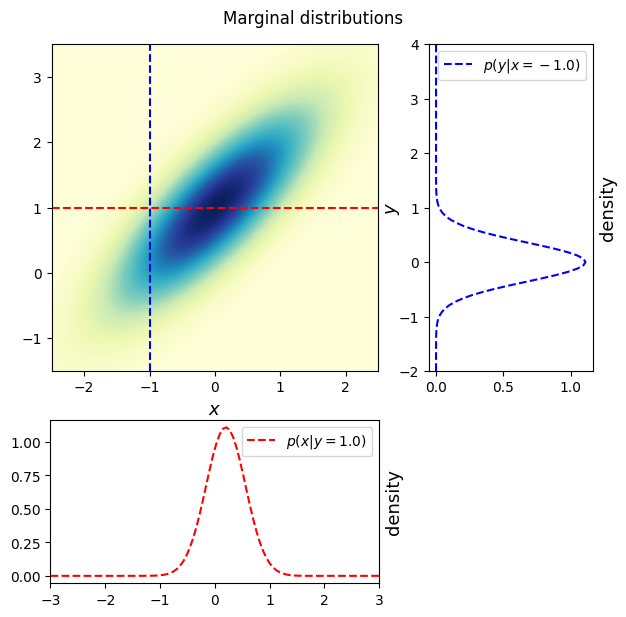

In [21]:
mu = np.array([[0.], [1.]])
cov = np.array([
    [1, 0.8], 
    [0.8, 1]
])

# Calculate x|y
y_condition = 1.  # To condition on y
mean_xgiveny = mu[0,0] + (cov[0,1]/cov[1,1]) * (y_condition- mu[1,0])
cov_xgiveny = cov[0,0] - cov[0,1]**2 / cov[1,1]

# Calculate y|x
x_condition = -1.  # To condition on x
mean_ygivenx =mu[1,0] + (cov[0,1]/cov[0,0]) * (x_condition - mu[0,0])
cov_ygivenx = cov[1,1] - cov[0,1]**2 / cov[0,0]


# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
plt.suptitle('Marginal distributions', y=0.93)

ax1 = plt.subplot(gs[0])
ax1.plot([-2.5, 2.5], [y_condition, y_condition], 'r--')
ax1.plot([x_condition, x_condition], [-1.5, 3.5], 'b--')

X = np.linspace(-3, 4,100)
Y = np.linspace(-3, 4,100)
xx, yy = np.meshgrid(X,Y)
Z = multivariate_normal(mu.flatten() ,cov).pdf(np.dstack((xx, yy)))
con = ax1.contourf(X, Y, Z, 100, cmap=cm.YlGnBu)
ax1.set_aspect('equal')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot x
ax2 = plt.subplot(gs[1])
x = np.linspace(-2, 4,100)
px = norm(mean_xgiveny, cov_xgiveny).pdf(x)
# Plot univariate distribution
ax2.plot(px, x,'b--', 
         label=f'$p(y|x={x_condition:.1f})$')
ax2.legend(loc=0)
ax2.set_ylabel('density', fontsize=13)
ax2.yaxis.set_label_position('right')
ax2.set_ylim(-2, 4)


# Plot y
ax3 = plt.subplot(gs[2])
x = np.linspace(-3, 3,100)
px = norm(mean_ygivenx, cov_ygivenx).pdf(x)
# Plot univariate distribution
ax3.plot(x, px, 'r--', 
         label=f'$p(x|y={y_condition:.1f})$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-3, 3)